# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.metrics import classification_report

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the "data.csv" file as a DataFrame object.
data_df = pd.read_csv("data.csv")

# Print shape info of the DataFrame.
print("Shape of the DataFrame:", data_df.shape)

# Print first 5 tuples of the DataFrame.
data_df.head()

Shape of the DataFrame: (1735, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# Check DataFrame for NaN values.
data_df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             5
dtype: int64

In [ ]:
# According to upper cell, "Arrival Delay in Minutes" has 5 NaN value.
# I will not delete these values because their count is too few. 
# I choose to fill them with median because of the mean can affect easily by the outliers.

data_df['Arrival Delay in Minutes'].fillna(data_df['Arrival Delay in Minutes'].median(), inplace = True)

In [ ]:
# I will check the categorical columns for encoding.
data_df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
# I will list how many categories for each categorical column.

display(data_df['satisfaction'].unique())
display(data_df['Gender'].unique())
display(data_df['Customer Type'].unique())
display(data_df['Type of Travel'].unique())
display(data_df['Class'].unique())

array(['satisfied', 'dissatisfied'], dtype=object)

array(['Female', 'Male'], dtype=object)

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

array(['Personal Travel', 'Business travel'], dtype=object)

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:
# I will change "label" variable categories manually.
data_df = data_df.replace(to_replace = ['dissatisfied', 'satisfied'],value = [0, 1])

# I will do One-Hot Encoding. Because the categories aren't ordinal and too few type.
# Firstly I will create a function for create dummies.
def dummy_creator(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name, dtype = 'int64')
    df = pd.concat([df, dummies], axis = 1)
    return df

# Create dummies for categorical columns.
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    data_df = dummy_creator(data_df, column)

# Delete the One-Hot Encoded Columns.
data_df.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'], inplace = True, axis = 1)

# Display the updated DataFrame.
data_df.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,0.0,1,0,1,0,0,1,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,305.0,0,1,1,0,0,1,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,...,0.0,1,0,1,0,0,1,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,0.0,1,0,1,0,0,1,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,0.0,1,0,1,0,0,1,0,1,0


In [ ]:
# Determine the features(x) and label(y) variable.
x = data_df.loc[:, data_df.columns != 'satisfaction']
y = data_df['satisfaction']

# Print shape info and first 5 tuples of the features.
print("Shape of features:", x.shape)
display(x.head())

# Print shape info and first 5 tuples of the label variable.
print("\nShape of label variable:", y.shape)
display(y.head())

Shape of features: (1735, 27)


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,1,0,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,1,0,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,0.0,1,0,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,0.0,1,0,1,0,0,1,0,1,0



Shape of label variable: (1735,)


0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [ ]:
# I didn't do normalization for my data.
# Because scaling affects my models badly. I think scales are important for this data.
# I mean by this sentence, it increase the accuracy but it is making my models overfitting.
# I didn't understand at the first time, so I do research on the internet from different sources.
# The proffesionals say mostly, scaling is need for distance measured classifiers but sometimes scaling getting worse to model.
# I tried and it affects my model badly, so I decided to don't normalize my data.

In [ ]:
# Shuffle the data, then split into train(%70), test(%20) and validation(%10).
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size= 0.2, random_state=21, shuffle = True)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=1/8, random_state=21)

# Show the shapes of the sets.
display(x_train.shape, x_test.shape, x_valid.shape)
display(y_train.shape, y_test.shape, y_valid.shape)

(1214, 27)

(347, 27)

(174, 27)

(1214,)

(347,)

(174,)

In [ ]:
# Firstly build a KNN model with train set and test with test data.
# After this step we will decide parameters over a validation set.

# Create a KNN Classifier instance with 5 neighbors.
knn = KNN(n_neighbors=5)
# Fit the model with train set.
knn.fit(x_train, y_train)
# Make predictions over the test set.
pred = knn.predict(x_test)
# Calculate the accuracy of model
accuracy = accuracy_score(y_test, pred)
# Print the accuracy score.
print("KNN Model Accuracy:", accuracy)

KNN Model Accuracy: 0.6743515850144092


In [ ]:
# Parameter selection with using validation set for KNN Model.

# Dicts for hold different distance metrics errors.
p1_errors = {}
p2_errors = {}

for k in range(1,21,1):   # Loop in k values.
    for pVal in [1,2]:    # Loop in p values.
        # Create a KNN Classifier instance with k neighbor, p distance.
        clf = KNN(n_neighbors = k, metric = 'minkowski', p = pVal)
        # Fit the model with train data.
        clf.fit(x_train, y_train)
        # Make predictions over the validation set.
        prediction = clf.predict(x_valid)
        # Calculate the f1_score.
        f1 = f1_score(prediction, y_valid)
        # Calculate error.
        error = 1 - f1
        # Add k - p pairs according to distance metric.
        if (pVal == 1):
            p1_errors[k] = error
        else:
            p2_errors[k] = error

print("According to Minkowski p = 1 distance, optimal k value and error:")
print("Optimal k :", min(p1_errors, key = p1_errors.get))
print("Error value:", p1_errors[min(p1_errors, key = p1_errors.get)])
print("\nAccording to Minkowski p = 2 distance, optimal k value and error:")
print("Optimal k:", min(p2_errors, key = p2_errors.get))
print("Error value:", p2_errors[min(p2_errors, key = p2_errors.get)])

According to Minkowski p = 1 distance, optimal k value and error:
Optimal k : 3
Error value: 0.17159763313609466

According to Minkowski p = 2 distance, optimal k value and error:
Optimal k: 5
Error value: 0.32544378698224863


In [ ]:
# Secondly we build a Logistic Regression Classifier with train data and test with test data.
# After this step we will decide parameters over a validation set.

# Creating Logistic Regression model.
lr = LogisticRegression()
# Fit the model with train data.
lr.fit(x_train, y_train)
# Make predictions over test data.
prediction = lr.predict(x_test)
# Calculate accuracy on the predictions and test data.
accuracy = accuracy_score(y_test, prediction)
# Print the accuracy.
print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 0.9740634005763689


In [ ]:
# Parameter Selection with using validation set for Logistic Regression Classifier Model.
# I tried to change penalty and random state parameter of Logistic regression but they don't affect result too much.
# I can check max_iter and c parameter but solver parameter gives a desired performance for me so I decide to can't check these.
# I will check solver parameter which using in optimization problems for Logistic Regression Classifier.
# I will not use liblinear and saga solvers, because they support l1 penalty but my model doesn't support it.

solver_parameters = ['newton-cg', 'lbfgs','sag']   # Solver parameters list.

for s in solver_parameters:   # Loop in solver parameters.
    # Create the Logistic Regression model with solver s.
    lr_clf = LogisticRegression(solver = s)  
    # Fit the model with train data.
    lr_clf.fit(x_train, y_train)   
    # Make prediction with validation set.
    prediction = lr_clf.predict(x_valid)  
    # Calculate error over prediction and validation set.
    error = 1 - f1_score(prediction, y_valid)
    # Print the errors for each solver.
    print(s, "error:", error)

newton-cg error: 0.016574585635359185
lbfgs error: 0.022222222222222143
sag error: 0.4078212290502793


In [ ]:
# Let's see models accuracies on the test data with updated parameters.

# According to before, kNN Model gives too lower error for k = 3 and p = 1
# Because of this reason I choose these optimal values as parameter.
knn_clf = KNN(n_neighbors = 3, metric = 'minkowski', p = 1)     # Create kNN instance with 3 neighbors, p = 1 distance.
knn_clf.fit(x_train, y_train)    # Fit the model with train data.
knn_pred = knn_clf.predict(x_test)   # Make predictions with test data.
knn_accuracy = accuracy_score(y_test, knn_pred)   # Calculate accuracy on the test data.

# According to before, Logistic Regression Model gives too lower error with newton-cg solver.
# So I will use it for optimize the model.
lr_clf = LogisticRegression(solver = 'newton-cg')   # Create Logistic Regressor instance with newton-cg solver.
lr_clf.fit(x_train, y_train)   # Fit the model with train data.
lr_pred = lr_clf.predict(x_test)   # Make predictions with test data.
lr_accuracy = accuracy_score(y_test, lr_pred)   # Calculate accuracy on test data.

# Create a table with model - acccuracy pair.
models_df = pd.DataFrame({'Model': ['kNN', 'Logistic Regression'],
                   'Accuracy': [knn_accuracy, lr_accuracy]})

# Display the table.
models_df

,Model,Accuracy
0,kNN,0.841499
1,Logistic Regression,0.997118


In [ ]:
# I think most of my friends find the kNN's accuracy 0.98 - 1.00
# My kNN accuracy is lower because I didn't do re-scaling.
# Because when I do the scaling, my kNN Model being overfitted so I prefer the don't re-scaling.
# The choosed parameters increase the models accuracy as expected.
# Accuracy formula is (TP + TN)/n so:
# The kNN Model true prediction rate is lower than my Logistic Regression Model.
# Probably the Logistic Regression Model make predictions too much true.
# According to obtained result my Logistic Regression Model is more accurate than kNN Model.

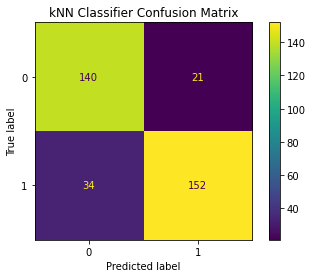

In [ ]:
# Plot confusion matrix of kNN model.

# Create kNN Model with 3 neighbors and p = 1 distance.
knn_model = KNN(n_neighbors = 3, metric = 'minkowski', p = 1)  
# Fit the model with train data.
knn_model.fit(x_train, y_train)   
# Create and plot confusion matrix with using model and test data.
plot_confusion_matrix(knn_model, x_test, y_test)   
# Give a title to Matrix.
plt.title('kNN Classifier Confusion Matrix') 
# Show the confusion matrix of kNN.
plt.show()   

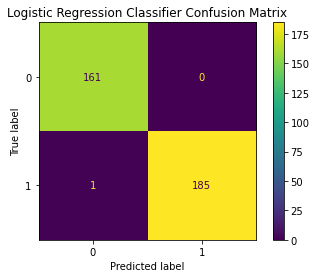

In [ ]:
# Plot confusion matrix of Logistic Regression Model.

# Create Logistic Regression Model with newton-cg solver.
lr_model = LogisticRegression(solver = 'newton-cg')
# Fit the model with train data.
lr_model.fit(x_train, y_train)   
# Create and plot confusion matrix with using model and test data.
plot_confusion_matrix(lr_model, x_test, y_test)
# Give a title to Matrix.
plt.title('Logistic Regression Classifier Confusion Matrix')
# Show the confusion matrix of Logistic Regressor.
plt.show()  

In [ ]:
# As expected from my accuracy comments, the Logistic Regression Classifier predicted true too much.
# When we calculate error rate from (FP + FN)/n formula, the Logistic Regressors error rate is 1/347.
# When we calculate error rate from (FP + FN)/n formula, the kNN Model error rate is 55/347.
# According to error rates, Logistic Regression Classifier works with lower error rate.
# My kNN Model is successfull too, but my Logistic Regression Model too much successfull than kNN.
# As a result, Logistic Regression Model making more successfull predictions than kNN Model.

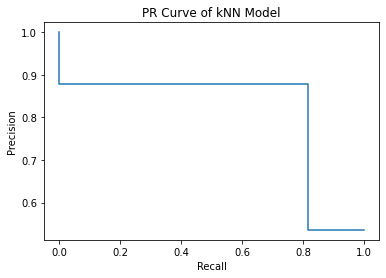

In [ ]:
# Make predictions with test data for kNN Model which created at confusion matrix step.
predictions = knn_model.predict(x_test)  
# Arrange precision - recall pairs. "_" means threshold.
precision, recall, _ = precision_recall_curve(y_test, predictions) 
# Display the curve.
disp = PrecisionRecallDisplay(precision = precision, recall = recall)  
# Plot the curve.
disp.plot()   
# Give a title to curve.
plt.title("PR Curve of kNN Model")  
# Show the curve.
plt.show()  

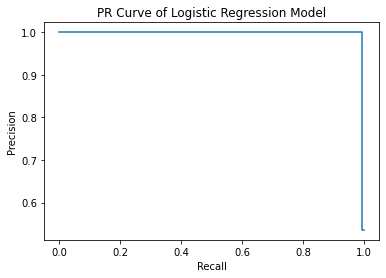

In [ ]:
# Make predictions with test data for Logistic Regression model which created at confusion matrix step.
predictions_lr = lr_model.predict(x_test) 
# Arrange precision - recall pairs. "_" mean threshold.
precision_lr, recall_lr, _ = precision_recall_curve(y_test, predictions_lr) 
# Display the curve.
disp_lr = PrecisionRecallDisplay(precision = precision_lr, recall = recall_lr)
# Plot the curve.
disp_lr.plot()
# Give a title the curve.
plt.title("PR Curve of Logistic Regression Model")
# Show the curve.
plt.show()

In [ ]:
# As expected from confusion and accuracy comments, the PR curve of Logistic Regression Model is better.
# I can explain this successfulity with 2 reason.
# First of all the Logistic Regression Models Curve is closer to ideal (1,1) than kNN Curve.
# Secondly, the area under the kNN Model Curve is smaller than Logistic Regression Model.
# Because of these reasons, the Logistic Regression Model's PR Curve is better than kNN's.

In [ ]:
print("kNN Classifier")
print("-----------------")
# Evaluate the prediction performance of the kNN Model
print(classification_report(y_test, predictions))
print("\nAccuracy:", knn_accuracy)

kNN Classifier
-----------------
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       161
           1       0.88      0.82      0.85       186

    accuracy                           0.84       347
   macro avg       0.84      0.84      0.84       347
weighted avg       0.84      0.84      0.84       347


Accuracy: 0.8414985590778098


In [ ]:
print("Logistic Regression Classifier")
print("--------------------------------")
# Evaluate the prediction performance of the Logistic Regression Model.
print(classification_report(y_test, predictions_lr))
print("\nAccuracy:", lr_accuracy)

Logistic Regression Classifier
--------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           1       1.00      0.99      1.00       186

    accuracy                           1.00       347
   macro avg       1.00      1.00      1.00       347
weighted avg       1.00      1.00      1.00       347


Accuracy: 0.9971181556195965


In [ ]:
# According to these stats, two of the models work good.
# The Logistic Regression Model has more precision, recall and f1 score than kNN Model.
# The kNN Model is less accurate than the Logistic Regression Model.
# As obtained evaluated prediction performances, proved the Logistic Regression Model is better.